# Guided Project: Cleaning and Analyzing Employee Exit Surveys

### Data taken from exit surveys given to employees at the Australian Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) Insitute in Queensland, Australia

#### Results of the two sets of survey data will be combined and cleaned in order to answer questions regarding employee satisfaction. Namely, 'did older or younger employees leave due to some kind of satisfaction' and 'did employees who remained only a short time or employees who remained for long stretches leave due to some kind of satisfaction'? 

In [1]:
import pandas as pd
import numpy as np

# Read in DETE survey data
dete_survey = pd.read_csv('dete_survey.csv')

# Read in TAFE survey data
tafe_survey = pd.read_csv('tafe_survey.csv')

# Preliminary exploration of both data sets
print(dete_survey.info())
print()
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [2]:
# Examples from DETE dataset
print(dete_survey.head())

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

In [3]:
# Examples from TAFE dataset
print(tafe_survey.head())

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                   

In [4]:
# Exploring values in DETE
print(dete_survey['SeparationType'].value_counts(dropna=False))
print()
print(dete_survey['Region'].value_counts(dropna=False))
print()
print(dete_survey['Job dissatisfaction'].value_counts(dropna=False))
print()
print(dete_survey['Employment Status'].value_counts(dropna=False))

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

Metropolitan                135
Central Office              130
South East                  108
Not Stated                  105
Darling Downs South West     95
Central Queensland           84
North Coast                  75
North Queensland             53
Far North Queensland         37
Name: Region, dtype: int64

False    733
True      89
Name: Job dissatisfaction, dtype: int64

Permanent Full-time    434
Permanent Part-time    308
Temporary Full-time     41
Temporary Part-time     24
Casual                  10
NaN                      5
Name: Employment Status

In [5]:
# Exploring values in TAFE
print(tafe_survey['Reason for ceasing employment'].value_counts(dropna=False))
print()
print(tafe_survey['Contributing Factors. Study'].value_counts(dropna=False))
print()
print(tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts(dropna=False))


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64

-        421
NaN      265
Study     16
Name: Contributing Factors. Study, dtype: int64

Less than 1 year      147
NaN                   106
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64


In [6]:
# Counting null values
print(dete_survey.isnull().sum())
print()
print(tafe_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

### DETE SURVEY
#### Data in the DETE survey consists of 822 entries. Notable columns of concern are 'Classification', 'Business Unit', and columns concerning ethinc origins, all of which have 350+ missing values. After determining the efficacy of these columns, other columns with missing data (< 100 entries) will be examined and treated.

### TAFE SURVEY
#### The TAFE Survey conatins 702 total entries with column names different to the DETE survey. After standardizing column names and matching columns, the survey data may be combined for further cleaning. Of note is the large number of missing cells in nearly all rows of the data. Each column will need to be further inspected to determine next steps.

In [7]:
# Re-read DETE survey in replacing 'Not Stated' values with NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [8]:
# Drop unnecessary columns from DETE (28-48)
dete_cols_to_drop = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(dete_cols_to_drop, axis=1)

# Drop unneccessary columns from TAFE (17-65)
tafe_cols_to_drop = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(tafe_cols_to_drop, axis=1)

In [9]:
print(tafe_survey.columns[17:66])

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

#### Since our analysis is focused on the effect of dissatisfaction on employee exits, we have dropped any columns from the data sets that do not deal with this topic; i.e., rating the organization, onboarding process, business unit on different metrics

In [10]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [11]:
# Update and standardize column names
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.replace(' ', '_')
                               .str.lower()
                               .str.strip()
                              )

In [12]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [13]:
# Create mapping of updated column names for TAFE to match DETE
mapping = {'Record ID': 'id',
          'CESSATION YEAR': 'cease_date', 
          'Reason for ceasing employment': 'separationtype',
          'Gender. What is your Gender?': 'gender',
          'CurrentAge. Current Age': 'age',
          'Employment Type. Employment Type': 'employment_status',
          'Classification. Classification': 'position',
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
          }

# Rename columns in TAFE
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)

In [14]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [15]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


#### Columns in the DETE survey have been standardized to an all lowercase format with underscores replacing any spaces. The TAFE survey columns which have corresponding columns in the DETE survey have been renamed to match. 

In [16]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [17]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [18]:
# Create dataframe containing only respondents who resigned from DETE
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')]
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [19]:
# Create dataframe containing only respondents who resigned from TAFE
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', na=False)]
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

#### The former blocks of code have sucessfully removed any entries in both datasets that are irrelevant to our analysis. Only rows with responses from employees who have resigned remain

In [20]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [21]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.replace(r'[0-9][0-9]/', '').astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [23]:
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [24]:
wrong_dates = dete_resignations[dete_resignations['cease_date'] - dete_resignations['dete_start_date'] < 0]
wrong_dates

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb


#### For DETE data, cease dates have been standardized to years only and float dtypes. Both 'cease_date' and 'dete_start_date' have been examined for erroneous dates and care has been taken to make sure no cease date is earlier than a start date for a given column. Similar measures should now be taken for TAFE data

In [25]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

#### TAFE and DETE cease date and start date columns are clean

In [26]:
# Create column in DETE data that contains number of years worked
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [27]:
dete_resignations['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

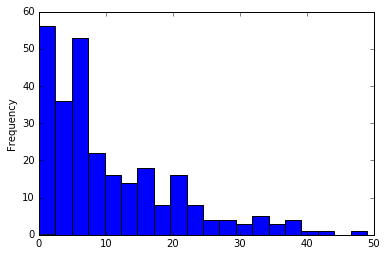

In [28]:
import matplotlib
%matplotlib inline
dete_resignations['institute_service'].plot(kind='hist', bins=20)

#### In order to analyze the differences between employees who've worked short periods and those who've worked for long periods, we've created a column in the DETE dataset corresponding to one in the TAFE dataset that measures the number of years worked. We can see from the graph above that the majority of resigned workers left before 20 years of service. The longest any one resigned worker served was 49 years. 50+ respondents worked 0 years (less than 1 year).

#### Now, we will create a column summarizing information about job dissatisfaction for each data set.

In [29]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [30]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

#### In the TAFE survey, entries in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' indicate an employee was dissatisfied with their job by entering the column name in the cell for each respective column. An entry of '-' indicates the employee did not select this column as a reason for leaving. Each column also has 8 NaN values, possibly indicating this question was not answered. We will summarize these two columns by creating a new column, 'dissatisfaction', that will contain True for any row that has it's column name as an entry for the two columns summarized and False for any column with '-' or NaN as an entry.

In [31]:
# create function that replaces entries with True or False
def update_vals(val):
    if (val == '-') | (pd.isnull(val)):
        return False
    else:
        return True

In [32]:
tafe_res_dissatisfaction = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
tafe_res_dissatisfaction

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


In [33]:
dete_dissatisfaction_cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']

In [34]:
tafe_resignations['dissatisfaction'] = tafe_res_dissatisfaction.any(axis=1, skipna=False)


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
dete_resignations['dissatisfaction'] = dete_resignations[dete_dissatisfaction_cols].any(axis=1, skipna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

#### We've now created a column, 'dissatifaction' in each dataset that indicates whether an employee resigned due in part to dissatifaction. The data sets may now be combined for analysis

In [37]:
# Add column to identify source
tafe_resignations_up['institute'] = 'TAFE'
dete_resignations_up['institute'] = 'DETE'

In [38]:
# Combine data vertically
combined = pd.concat([tafe_resignations_up, dete_resignations_up])

In [39]:
combined_updated = combined.dropna(thresh=500, axis=1)

In [40]:
combined_updated

,age,cease_date,dissatisfaction,employment_status,gender,id,institute,institute_service,position,separationtype
3,NaN,2010.0,False,NaN,NaN,6.341399e+17,TAFE,NaN,NaN,Resignation
4,41 45,2010.0,False,Permanent Full-time,Male,6.341466e+17,TAFE,3-4,Teacher (including LVT),Resignation
5,56 or older,2010.0,False,Contract/casual,Female,6.341475e+17,TAFE,7-10,Teacher (including LVT),Resignation
6,20 or younger,2010.0,False,Temporary Full-time,Male,6.341520e+17,TAFE,3-4,Administration (AO),Resignation
7,46 50,2010.0,False,Permanent Full-time,Male,6.341537e+17,TAFE,3-4,Teacher (including LVT),Resignation
8,36 40,2009.0,False,Temporary Full-time,Female,6.341579e+17,TAFE,3-4,Tutor,Resignation
9,21 25,2010.0,False,Permanent Full-time,Female,6.341588e+17,TAFE,1-2,Administration (AO),Resignation
10,41 45,2010.0,False,Temporary Part-time,Female,6.341588e+17,TAFE,Less than 1 year,Administration (AO),Resignation
13,31 35,2010.0,False,Temporary Full-time,Female,6.341725e+17,TAFE,11-20,Administration (AO),Resignation
14,31 35,2010.0,True,Permanent Part-time,Female,6.341726e+17,TAFE,7-10,Teacher (including LVT),Resignation


#### The data sets have now been combined and any columns with unnecessary data or exessive null values have been dropped. 

In [41]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
17.0                   6
14.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
36.0                   2
28.0                   2
30.0                   2
25.0                   2
26.0                   2


In [42]:
# Extract years worked at company
years_service = combined_updated['institute_service'].astype(str)
years_service = years_service.str.replace('Less than ', '').str.replace('More than ', '').str.replace(' year', '').str.replace('s', '')
years_service = years_service.str.split('-')
years_service

3         [nan]
4        [3, 4]
5       [7, 10]
6        [3, 4]
7        [3, 4]
8        [3, 4]
9        [1, 2]
10          [1]
13     [11, 20]
14      [7, 10]
15     [11, 20]
16        [nan]
17      [7, 10]
18        [nan]
19        [nan]
20        [nan]
21        [nan]
22       [5, 6]
23          [1]
24      [7, 10]
26        [nan]
27         [20]
29          [1]
32          [1]
36        [nan]
37        [nan]
39        [nan]
40          [1]
41     [11, 20]
42       [3, 4]
         ...   
747       [6.0]
751       [8.0]
752      [15.0]
753       [9.0]
755       [1.0]
762       [0.0]
766       [7.0]
769       [5.0]
770       [nan]
771      [12.0]
774       [nan]
784       [0.0]
786      [20.0]
788       [nan]
789      [31.0]
790       [6.0]
791       [nan]
794       [nan]
797       [nan]
798       [nan]
802       [nan]
803      [10.0]
804       [6.0]
806       [8.0]
807       [9.0]
808       [3.0]
815       [2.0]
816       [2.0]
819       [5.0]
821       [nan]
Name: institute_service,

In [43]:
# create a function that maps years worked to classifcation
# skip 'nan' values
def update_year_cat(years):
    if years[0] != 'nan':
        year = float(years[0])
        if year < 3:
            return 'New'
        elif year < 7:
            return 'Experienced'
        elif year < 11:
            return 'Established'
        else:
            return 'Veteran'

service_cat = years_service.apply(update_year_cat)
service_cat

3             None
4      Experienced
5      Established
6      Experienced
7      Experienced
8      Experienced
9              New
10             New
13         Veteran
14     Established
15         Veteran
16            None
17     Established
18            None
19            None
20            None
21            None
22     Experienced
23             New
24     Established
26            None
27         Veteran
29             New
32             New
36            None
37            None
39            None
40             New
41         Veteran
42     Experienced
          ...     
747    Experienced
751    Established
752        Veteran
753    Established
755            New
762            New
766    Established
769    Experienced
770           None
771        Veteran
774           None
784            New
786        Veteran
788           None
789        Veteran
790    Experienced
791           None
794           None
797           None
798           None
802           None
803    Estab

#### In order to aid analysis based on tenure at the organization, we've created a classification for the years of service for each worker.
#### New: 0-3 Years, Experienced: 3-6 Years, Established: 7-10 Years, Veteran: 11+ Years

In [44]:
combined_updated['service_cat'] = service_cat

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [46]:
combined_updated['dissatisfaction'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfaction, dtype: int64

In [47]:
pv_combined_updated = combined_updated.pivot_table('dissatisfaction', 'service_cat')
pv_combined_updated

,dissatisfaction
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


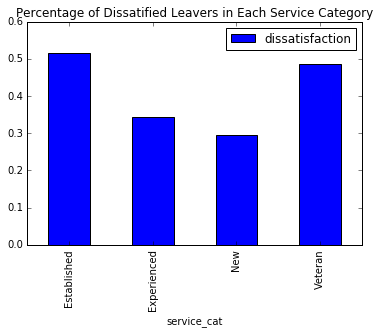

In [50]:
pv_combined_updated.plot(kind='bar', title='Percentage of Dissatified Leavers in Each Service Category')


#### We can see from the graph that the most dissatisfied resigners were those who had worked at the organization for 7+ years. Specifically, the Established group (7-10 Years) showed marked dissatisfaction with over 50% of employees reporting that they left dissatisfied. Veterans (11+ Years) were not much more content, with 